In [31]:
import pandas as pd

In [36]:
df = pd.read_csv('aula_01_exemplo_01.csv', sep=",")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [34]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [35]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [9]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [10]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [11]:
df[df['smoker'] == 'yes']

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [12]:
df[df['bmi'] > 30]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55230
2,28,male,33.00,3,no,southeast,4449.46200
6,46,female,33.44,1,no,southeast,8240.58960
12,23,male,34.40,0,no,southwest,1826.84300
13,56,female,39.82,0,no,southeast,11090.71780
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1332,52,female,44.70,3,no,southwest,11411.68500
1333,50,male,30.97,3,no,northwest,10600.54830
1334,18,female,31.92,0,no,northeast,2205.98080


In [19]:
df['obese'] = df['bmi'] > 30

df.head()

,age,sex,bmi,children,smoker,region,charges,obese
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [30]:
df.groupby('sex')['obese'].mean()

sex
female    0.504532
male      0.548817
Name: obese, dtype: float64

In [13]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [41]:
df['age_group'] = pd.cut(df['age'], bins=[0,18,30,45,60,100], labels=['0-18','19-30','31-45','46-60','60+'])

df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,19-30
1,18,male,33.770,1,no,southeast,1725.55230,0-18
2,28,male,33.000,3,no,southeast,4449.46200,19-30
3,33,male,22.705,0,no,northwest,21984.47061,31-45
4,32,male,28.880,0,no,northwest,3866.85520,31-45


In [45]:
df.groupby('age_group')['charges'].mean()


/tmp/ipykernel_37046/3978434151.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['charges'].mean()


age_group
0-18      7086.217556
19-30     9822.837599
31-45    12647.455654
46-60    16340.993846
60+      21063.163398
Name: charges, dtype: float64

In [22]:
pd.pivot_table(df, values='charges', index='sex', columns='smoker', aggfunc='mean')

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


<Axes: >

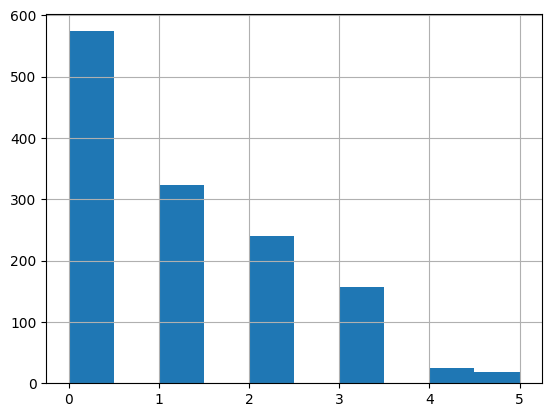

In [37]:
df['children'].hist()

<Axes: >

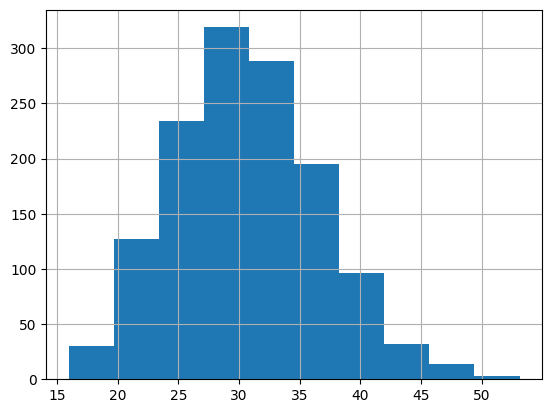

In [14]:
df['bmi'].hist()

<Axes: >

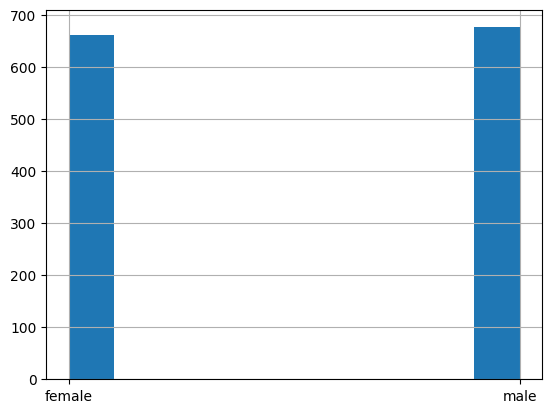

In [15]:
df['sex'].hist()

<Axes: title={'center': 'charges'}, xlabel='sex'>

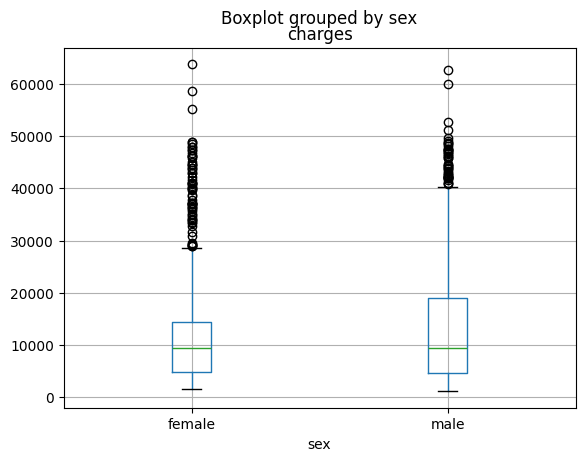

In [16]:
df.boxplot(column='charges', by='sex')